In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 11s 1us/step


In [4]:
len(x_train)

60000

In [5]:
x_train[0].shape


(28, 28)

In [6]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

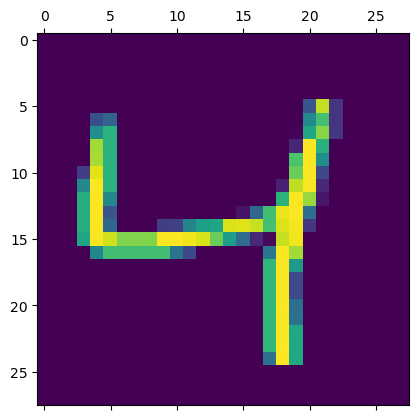

In [8]:
plt.matshow(x_train[2])

In [9]:
y_train[0]

5

In [15]:
x_train = x_train/255
x_test = x_test/255

In [16]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [17]:
x_train_flattened = x_train.reshape(len(x_train),28*28)
x_test_flattened = x_test.reshape(len(x_test),28*28)
x_test_flattened.shape

(10000, 784)

In [18]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4690 - accuracy: 0.8767
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3042 - accuracy: 0.9155
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2838 - accuracy: 0.9209
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2735 - accuracy: 0.9237
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2668 - accuracy: 0.9255


In [19]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2705 - accuracy: 0.9251


[0.2704666554927826, 0.9251000285148621]

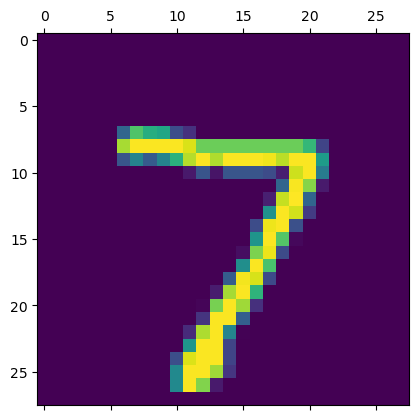

In [20]:
plt.matshow(x_test[0])

In [22]:
y_predicted = model.predict(x_test_flattened)

313/313 [==============================] - 0s 1ms/step


In [23]:
y_predicted[0]

array([2.67555714e-02, 4.78955997e-07, 5.72819598e-02, 9.59583938e-01,
       1.57997524e-03, 1.28443480e-01, 1.64658286e-06, 9.99834955e-01,
       1.20027214e-01, 7.31339395e-01], dtype=float32)

In [25]:
np.argmax(y_predicted[1])

2

In [26]:
y_predicted_label = [np.argmax(i) for i in y_predicted]
y_predicted_label[:5]

[7, 2, 1, 0, 4]

In [30]:
cm = tf.math.confusion_matrix(labels=y_test,predictions = y_predicted_label)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    1,    1,    0,    5,    5,    3,    1,    0],
       [   0, 1111,    3,    2,    0,    1,    4,    2,   12,    0],
       [   7,    9,  917,   16,    6,    4,   13,   12,   45,    3],
       [   4,    0,   17,  912,    0,   32,    2,   12,   24,    7],
       [   2,    1,    2,    1,  890,    0,   15,    6,   12,   53],
       [   9,    2,    2,   27,    7,  791,   17,    3,   27,    7],
       [  11,    3,    6,    1,    7,   14,  912,    2,    2,    0],
       [   1,    7,   20,    7,    2,    0,    0,  954,    5,   32],
       [   7,    7,    7,   18,    9,   31,    8,   11,  869,    7],
       [  11,    7,    1,   11,   15,    6,    0,   21,    6,  931]])>

Text(95.72222222222221, 0.5, 'Truth')

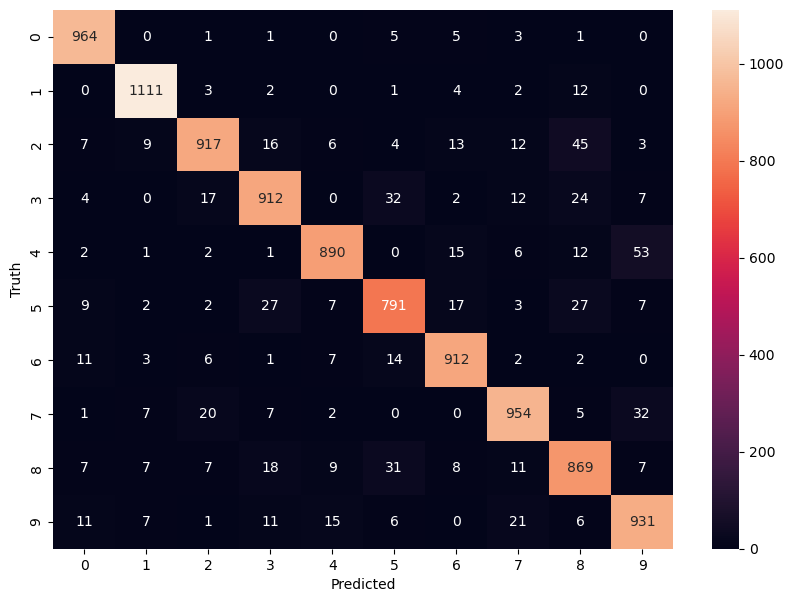

In [34]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [35]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2716 - accuracy: 0.9234
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1260 - accuracy: 0.9622
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0882 - accuracy: 0.9734
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0680 - accuracy: 0.9801
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0543 - accuracy: 0.9836


In [36]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0930 - accuracy: 0.9720


[0.09295612573623657, 0.972000002861023]

In [37]:
cm = tf.math.confusion_matrix(labels=y_test,predictions = y_predicted_label)
cm


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    1,    1,    0,    5,    5,    3,    1,    0],
       [   0, 1111,    3,    2,    0,    1,    4,    2,   12,    0],
       [   7,    9,  917,   16,    6,    4,   13,   12,   45,    3],
       [   4,    0,   17,  912,    0,   32,    2,   12,   24,    7],
       [   2,    1,    2,    1,  890,    0,   15,    6,   12,   53],
       [   9,    2,    2,   27,    7,  791,   17,    3,   27,    7],
       [  11,    3,    6,    1,    7,   14,  912,    2,    2,    0],
       [   1,    7,   20,    7,    2,    0,    0,  954,    5,   32],
       [   7,    7,    7,   18,    9,   31,    8,   11,  869,    7],
       [  11,    7,    1,   11,   15,    6,    0,   21,    6,  931]])>

Text(95.72222222222221, 0.5, 'Truth')

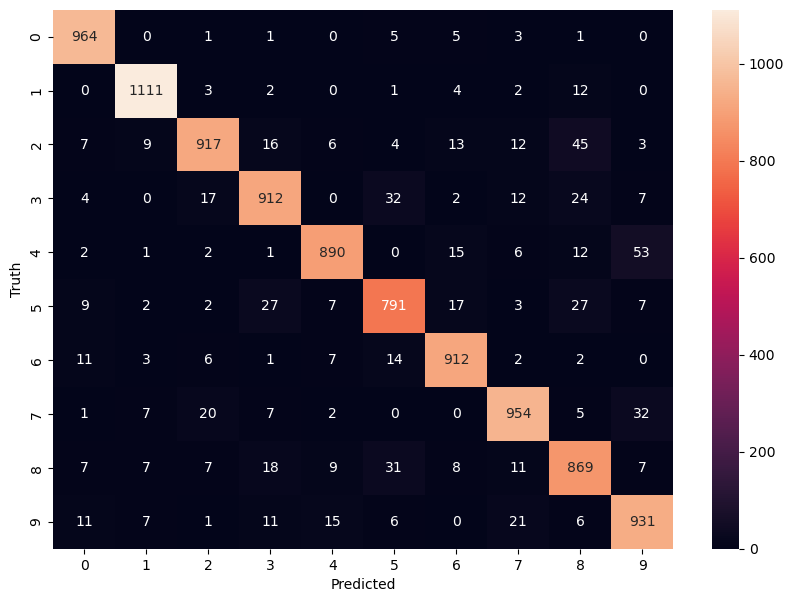

In [38]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [39]:
y_predicted = model.predict(x_test_flattened)

313/313 [==============================] - 0s 1ms/step


In [40]:
y_predicted_label = [np.argmax(i) for i in y_predicted]
y_predicted_label[:5]

[7, 2, 1, 0, 4]

In [41]:
cm = tf.math.confusion_matrix(labels=y_test,predictions = y_predicted_label)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 974,    1,    0,    0,    1,    0,    0,    2,    2,    0],
       [   0, 1128,    3,    0,    0,    1,    2,    0,    1,    0],
       [   7,    3,  993,    2,    3,    1,    2,   11,   10,    0],
       [   0,    1,    3,  991,    0,    4,    0,    5,    2,    4],
       [   1,    2,    6,    0,  931,    0,    3,    4,    1,   34],
       [   2,    1,    0,    6,    0,  871,    4,    0,    3,    5],
       [   7,    2,    4,    1,    1,    8,  930,    2,    3,    0],
       [   1,    9,    6,    2,    0,    0,    0,  993,    1,   16],
       [   5,    2,    2,    9,    6,    7,    1,    3,  920,   19],
       [   2,    2,    0,    3,    5,    2,    1,    5,    0,  989]])>

Text(95.72222222222221, 0.5, 'Truth')

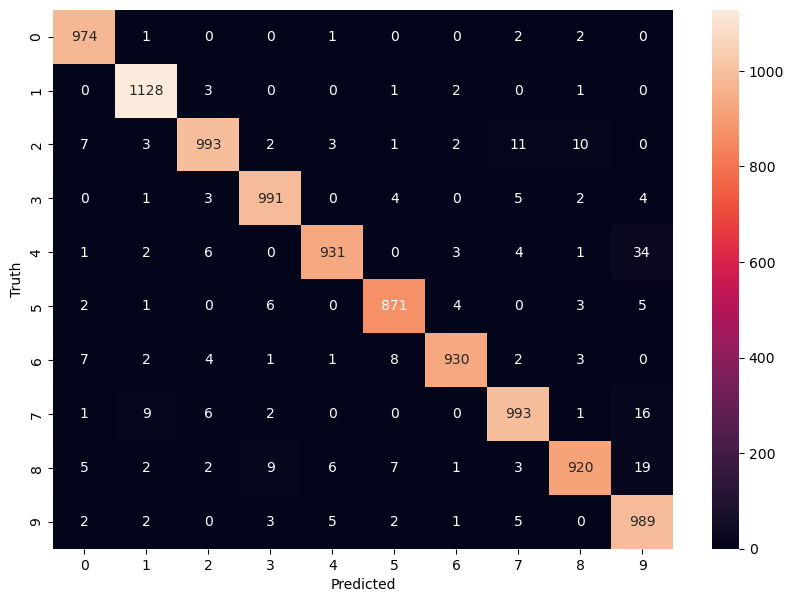

In [42]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [49]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='tanh'),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2515 - accuracy: 0.9253
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1100 - accuracy: 0.9658
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0751 - accuracy: 0.9767
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0555 - accuracy: 0.9824
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0431 - accuracy: 0.9856
